# Project 04 Vectorization and Topic Modeling

In [33]:
import pickle
import numpy as np
import pandas as pd

In [34]:
np.set_printoptions(precision=12)
np.set_printoptions(suppress=True)

In [35]:
# Make better use of Jupyter Notebook cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 400)
pd.options.display.float_format = '{:,.10f}'.format

### Load Data Frame(s)

In [128]:
df_tweets_final_processed_w_dates = pickle.load( open( "df_tweets_final_processed_w_dates.p", "rb" ) )

In [129]:
df_tweets_final_processed_w_dates.shape

(198669, 13)

In [130]:
df_aug2020_feb2021 = pickle.load( open( "df_aug2020_feb2021.p", "rb" ) )

In [131]:
df_aug2020_feb2021.shape

(56827, 13)

In [132]:
df_aug2020_feb2021.head()

,tweet,id,username,name,date,time,VBA Tweet,VA Tweet,VHA Tweet,dow,week,week_alt,month
66,Veterans_Benefits_Admin mr secretary mcdonough good afternoon as you can see from my attached documentation i have been fighting this issue of changing my discharge due to systemic racism for over years,1361866444410155013,clickforjustice,clickforjustice,2021-02-16,21:33:57,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02
70,Veterans_Benefits_Admin in howard became the first female fourstar admiral amp the first to command operational forces making her the highest ranking woman amp africanamerican in navy history after a remarkable career adm howard retired in thank you for your …,1361854662488555525,lccc_sva,LCCC SVA,2021-02-16,20:47:08,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02
74,Veterans_Benefits_Admin vbatribute trailblazer michelle howard set many firsts during her career with usnavy a veteran of the gulf war she served in operation desert shield and desert storm amp in became the first africanamerican woman to …,1361854659409965057,lccc_sva,LCCC SVA,2021-02-16,20:47:07,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02
78,in howard became the first female fourstar admiral amp the first to command operational forces making her the highest ranking woman amp africanamerican in navy history after a remarkable career adm howard retired in thank you for your service adm howard,1361842314264502273,vavetbenefits,Veterans Benefits,2021-02-16,19:58:04,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02
82,vbatribute trailblazer michelle howard set many firsts during her career with usnavy a veteran of the gulf war she served in operation desert shield and desert storm amp in became the first africanamerican woman to command a navy ship the uss rushmore,1361842311911497731,vavetbenefits,Veterans Benefits,2021-02-16,19:58:03,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02


### NMF

#### Remove Stop Words

In [134]:
from sklearn.feature_extraction import text 

In [136]:
additional_stop_words = ['rt','vets','vet','veteran','veterans']
additional_stop_words2 = ['rt','vets','vet','veteran','veterans','Veterans_Benefits_Admin','veterans_benefits_admin', 'veterans_health_admin',
                          'Veterans_Health_Admin','department_of_va','veteransbenefitsadmin departmentofva', 
                          'veteransbenefitsadmin departmentofva veterans_health_adminadminadminadminadmin', 
                          'departmentofva veterans_health_adminadminadminadminadmin', 'veteransbenefitsadmin', 
                          'veterans_health_adminadminadminadminadmin', 'departmentofva','va','cnn', 'foxnews','msnbc','nbc','abc','fox']

stop_wordz = text.ENGLISH_STOP_WORDS.union(additional_stop_words)
stop_wordz2 = text.ENGLISH_STOP_WORDS.union(additional_stop_words2)

#### Vectorize

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import NMF

In [138]:
vectorizer_sw_only_cvec_ngrams1 = CountVectorizer(stop_words = stop_wordz2)
doc_word_sw_only_cvec_ngrams1 = vectorizer_sw_only_cvec_ngrams1.fit_transform(df_aug2020_feb2021['tweet'])
doc_word_sw_only_cvec_ngrams1.shape

(56827, 58025)

In [139]:
vectorizer_sw_only_cvec_ngrams3 = CountVectorizer(stop_words = stop_wordz2, ngram_range=(1, 3))
doc_word_sw_only_cvec_ngrams3 = vectorizer_sw_only_cvec_ngrams3.fit_transform(df_aug2020_feb2021['tweet'])
doc_word_sw_only_cvec_ngrams3.shape

(56827, 958992)

In [140]:
vectorizer_tfidf_ngrams1_sw2 = TfidfVectorizer(ngram_range=(1,1), stop_words=stop_wordz2)
doc_word_tfidf_ngrams1_sw2 = vectorizer_tfidf_ngrams1_sw2.fit_transform(df_aug2020_feb2021['tweet'])
doc_word_tfidf_ngrams1_sw2.shape

(56827, 58025)

In [141]:
vectorizer_tfidf_ngrams3_sw2 = TfidfVectorizer(ngram_range=(1,3), stop_words=stop_wordz2)
doc_word_tfidf_ngrams3_sw2 = vectorizer_tfidf_ngrams3_sw2.fit_transform(df_aug2020_feb2021['tweet'])
doc_word_tfidf_ngrams3_sw2.shape

(56827, 958992)

#### Perform NMF Analysis

In [142]:
def NMF_tester(topic_count,df,doc_word,vectorizer):
    print("TOPIC COUNT {}".format(topic_count))
    nmf_model = NMF(topic_count)
    nmf_doc_topic = nmf_model.fit_transform(doc_word)
    #df_doc_topic = pd.DataFrame(data=doc_topic, columns=["column1", "column2"]) 
    print("Doc Topic Shape is: ", nmf_doc_topic.shape)
    #print(doc_topic[0])
    #print("The Topic matrix is: ",doc_topic)
    print('\n')
    words = vectorizer.get_feature_names()
    t = nmf_model.components_.argsort(axis=1)[:,-1:-7:-1]
    topic_words = [[words[e] for e in l] for l in t]
    print("The Topic Words are: ")
    counter = 0
    for i in topic_words:
        print("Topic {}".format(counter))
        print(i)
        print('-----------------')
        counter+=1
    
    df['topic_count_{}'.format(topic_count)] = nmf_doc_topic.argmax(axis=1)
    print('---------------------------------------------------------------------------')
    columns_list=[]
    for i in range(topic_count):
        columns_list.append('Topic {}'.format(i))
    df_doc_topic = pd.DataFrame(nmf_doc_topic, columns=columns_list)
    return df_doc_topic

In [143]:
nmf_cvec_25_topics_doc_topic = NMF_tester(25, df_aug2020_feb2021, doc_word_sw_only_cvec_ngrams3,vectorizer_sw_only_cvec_ngrams3)

TOPIC COUNT 25
Doc Topic Shape is:  (56827, 25)


The Topic Words are: 
Topic 0
['usdol', 'interior', 'usnavy usmc usairforce', 'usnavy usmc', 'usedgov', 'usarmy interior']
-----------------
Topic 1
['usmc', 'usarmyeurope', 'usmarinecorps', 'usnavyseals', 'usarmy', 'usmc usmarinecorps']
-----------------
Topic 2
['amp', 'ok', 'support', 'families', 'dr', 'work']
-----------------
Topic 3
['fbi', 'cia', 'cia fbi', 'tklforgiven', 'thewestonmike', 'nicomanocchio']
-----------------
Topic 4
['denismcdonough', 'hudgov', 'usda', 'ambassadorrice', 'hillaryclinton', 'mlfudge']
-----------------
Topic 5
['suicide', 'called', 'time', 'prevention', 'suicide prevention', 'told']
-----------------
Topic 6
['care', 'health', 'health care', 'mental', 'mental health', 'medical']
-----------------
Topic 7
['end', 'testing', 'dog', 'sign', 'permanently', 'abusive']
-----------------
Topic 8
['votevets', 'vfwhq', 'davhq', 'iava', 'votevets iava', 'uswomenveterans']
-----------------
Topic 9
['coronavirus

In [147]:
df_aug2020_feb2021.head()

,tweet,id,username,name,date,time,VBA Tweet,VA Tweet,VHA Tweet,dow,week,week_alt,month,topic_count_25
66,Veterans_Benefits_Admin mr secretary mcdonough good afternoon as you can see from my attached documentation i have been fighting this issue of changing my discharge due to systemic racism for over years,1361866444410155013,clickforjustice,clickforjustice,2021-02-16,21:33:57,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02,13
70,Veterans_Benefits_Admin in howard became the first female fourstar admiral amp the first to command operational forces making her the highest ranking woman amp africanamerican in navy history after a remarkable career adm howard retired in thank you for your …,1361854662488555525,lccc_sva,LCCC SVA,2021-02-16,20:47:08,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02,2
74,Veterans_Benefits_Admin vbatribute trailblazer michelle howard set many firsts during her career with usnavy a veteran of the gulf war she served in operation desert shield and desert storm amp in became the first africanamerican woman to …,1361854659409965057,lccc_sva,LCCC SVA,2021-02-16,20:47:07,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02,2
78,in howard became the first female fourstar admiral amp the first to command operational forces making her the highest ranking woman amp africanamerican in navy history after a remarkable career adm howard retired in thank you for your service adm howard,1361842314264502273,vavetbenefits,Veterans Benefits,2021-02-16,19:58:04,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02,2
82,vbatribute trailblazer michelle howard set many firsts during her career with usnavy a veteran of the gulf war she served in operation desert shield and desert storm amp in became the first africanamerican woman to command a navy ship the uss rushmore,1361842311911497731,vavetbenefits,Veterans Benefits,2021-02-16,19:58:03,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02,2


In [146]:
df_aug2020_feb2021.topic_count_25.value_counts()[:5]

13    10619
19     7663
15     4381
6      4289
9      4222
Name: topic_count_25, dtype: int64

### Update DF with Additional Vector Information

In [89]:
# Code to address incorrect update
# df_aug2020_feb2021 = df_aug2020_feb2021.drop(df_aug2020_feb2021.iloc[:, 14:], inplace = True, axis = 1)

In [148]:
df_aug2020_feb2021_copy = df_aug2020_feb2021.copy()

In [149]:
df_aug2020_feb2021_copy.shape

(56827, 14)

In [150]:
df_aug2020_feb2021_copy.reset_index(drop=True, inplace=True)

In [151]:
df_aug2020_feb2021_copy.tail()

,tweet,id,username,name,date,time,VBA Tweet,VA Tweet,VHA Tweet,dow,week,week_alt,month,topic_count_25
56822,while coronavirus_pandemic infections are spiking across several states it’s important to stay vigilant no matter where you live continue to follow cdc guidelines … for your health and the wellbeing of those around you,1289548465635307526,veteranshealth,Veterans Health,2020-08-01,09:08:07,0,0,1,5,2020-07-27/2020-08-02,2020-w31,2020-08,9
56823,fear and anxiety about the coronavirus_pandemic pandemic can be overwhelming and cause strong emotions in adults and children coping with stress will make you the people you care about and your community stronger,1289516277598322692,veteranshealth,Veterans Health,2020-08-01,07:00:13,0,0,1,5,2020-07-27/2020-08-02,2020-w31,2020-08,9
56824,estefonzii revmuldowney Veterans_Health_Admin its about you waking up to the fact that coronavirus_pandemic is being orchestrated for political reasons but you dont seem to be the kind of person who wakes but the kind of person who blindly obeys you are not doing any real good for yourself or anyone else,1289483405277634561,alejo300,Alex,2020-08-01,04:49:35,0,0,1,5,2020-07-27/2020-08-02,2020-w31,2020-08,9
56825,estefonzii revmuldowney Veterans_Health_Admin,1289482375986999297,alejo300,Alex,2020-08-01,04:45:30,0,0,1,5,2020-07-27/2020-08-02,2020-w31,2020-08,9
56826,Veterans_Health_Admin,1289482219635896323,alejo300,Alex,2020-08-01,04:44:53,0,0,1,5,2020-07-27/2020-08-02,2020-w31,2020-08,0


In [152]:
nmf_cvec_25_topics_doc_topic[:5]

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24
0,0.0000000000,0.0000000000,0.0009771847,0.0000000000,0.0002922638,0.0000000000,0.0010957354,0.0000000000,0.0000000000,0.0001743540,0.0000322548,0.0000000000,0.0000000000,0.0215063215,0.0003145708,0.0000000000,0.0003848649,0.0000000000,0.0031292722,0.0126497053,0.0000000000,0.0010407753,0.0000000000,0.0000000000,0.0000000000
1,0.0000000000,0.0000000000,0.1362014708,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0007532292,0.0372836065,0.0022968887,0.0000000000,0.0000000000,0.0000000000,0.0000037724
2,0.0020229689,0.0000000000,0.0669557371,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0575288121,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0458857933
3,0.0000000000,0.0000000000,0.1350529953,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0975994324,0.0015936414,0.0000000000,0.0000000000,0.0000000000,0.0000000000
4,0.0018261625,0.0000000000,0.0671273519,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0627869074,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0470192204


In [ ]:
df_aug2020_feb2021_copy = df_aug2020_feb2021_copy.join(pd.DataFrame(nmf_cvec_25_topics_doc_topic))

In [187]:
df_aug2020_feb2021_copy.shape

(56827, 40)

In [202]:
df_aug2020_feb2021_copy[df_aug2020_feb2021_copy['tweet'].str.contains("suicide")].sample(500).topic_count_25.value_counts()[:5]

5     205
15     58
19     54
6      51
2      45
Name: topic_count_25, dtype: int64

___
### Add masking columns
...for Mental Health and Suicide Risk, Coronavirus, and All Other Categories

In [172]:
equiv = {6:"Mental Health", 5:"Suicide", 9:"Coronavirus and Vaccine"}

In [173]:
df_aug2020_feb2021_copy["topic_group"] = df_aug2020_feb2021_copy["topic_count_25"].map(equiv)

In [180]:
df_aug2020_feb2021_copy['topic_group'] = df_aug2020_feb2021_copy['topic_group'].fillna('Other Topic')

In [188]:
df_aug2020_feb2021_copy.sample(2)

,tweet,id,username,name,date,time,VBA Tweet,VA Tweet,VHA Tweet,dow,week,week_alt,month,topic_count_25,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,topic_group
33162,department_of_va realdonaldtrump potus you can make formal complaint thats what i heard about vet accountability act,1315686220614180865,drarpatil,abhijeet patil,2020-10-12,12:10:13,0,1,0,0,2020-10-12/2020-10-18,2020-w42,2020-10,21,0.0137250193,0.0000000000,0.0011796636,0.0000330025,0.0000000000,0.0116620281,0.0013675587,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0031225066,0.0000000000,0.0089297529,0.0000000000,0.0031635561,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0985344859,0.0000000000,0.0000000000,0.0000000000,Other Topic
40337,department_of_va Veterans_Health_Admin research by john hopkins school of medicine reported in the new england journal of medicine in december reveals that the more tumor mutations are in a tumor dna the better are the chances that the person will respond to the immunotherapy drug,1303706900496867333,treda10,Fenia Petran,2020-09-09,10:48:41,0,1,1,2,2020-09-07/2020-09-13,2020-w37,2020-09,9,0.0000000000,0.0000000000,0.0023555356,0.0000000000,0.0000000000,0.0000000000,0.0057471195,0.0000000000,0.0000484594,0.0143486434,0.0001065040,0.0000000000,0.0000000000,0.0115236590,0.0011357872,0.0059701478,0.0000000000,0.0000000000,0.0007809797,0.0135618131,0.0000000000,0.0006431447,0.0000000000,0.0003164440,0.0000000000,Coronavirus and Vaccine


___
## Perform Sentiment Analysis

In [182]:
from textblob import TextBlob

In [183]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [184]:
sid_obj = SentimentIntensityAnalyzer()
sentiment = []
for text in df_aug2020_feb2021_copy.tweet:
    sentiment.append(sid_obj.polarity_scores(text))

In [186]:
len(sentiment)

56827

In [203]:
sentiment[:10]

[{'neg': 0.176, 'neu': 0.747, 'pos': 0.077, 'compound': -0.5719},
 {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.8126},
 {'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'compound': -0.5994},
 {'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.8126},
 {'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'compound': -0.5994},
 {'neg': 0.073, 'neu': 0.789, 'pos': 0.138, 'compound': 0.4215},
 {'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.5267},
 {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.714},
 {'neg': 0.164, 'neu': 0.567, 'pos': 0.269, 'compound': 0.4939},
 {'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'compound': 0.3182}]

#### Append Sentiment to Main DF

In [192]:
df_aug2020_feb2021_copy = pd.concat([df_aug2020_feb2021_copy,pd.DataFrame(sentiment)], axis=1)

In [207]:
df_aug2020_feb2021_copy.shape

(56827, 44)

In [197]:
df_aug2020_feb2021_copy.sample(2)

,tweet,id,username,name,date,time,VBA Tweet,VA Tweet,VHA Tweet,dow,week,week_alt,month,topic_count_25,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,topic_group,neg,neu,pos,compound
28335,hey benny weaseling is your best attribute gopchairwoman gop realdonaldtrump potus usarmy interior usedgov usdol usnationalguard usnavy usmc usairforce uscoastguard deptofdefense department_of_va,1323996812303343618,ikemajohnmjmcc,We The People,2020-11-04,09:33:33,0,1,0,2,2020-11-02/2020-11-08,2020-w45,2020-11,0,0.3914170764,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0004904513,0.0000000000,0.0002458323,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0003197147,0.0002243515,0.0005782764,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0348787360,0.0000000000,0.0000000000,0.0000000000,Other Topic,0.0000000000,0.8330000000,0.1670000000,0.6369000000
32063,i love how department_of_va says although me being a machine gunner is known to cause hearing loss my hearing loss is unrelated then turns right around and emails how “great” they are at helping us vets if department_of_va handled vets claims like geico suicides would drop ten fold,1317490513206005761,joshuapollard,Joshua Pollard,2020-10-17,11:39:50,0,1,0,5,2020-10-12/2020-10-18,2020-w42,2020-10,13,0.0000000000,0.0000000000,0.0010966596,0.0003938798,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0008413896,0.0000000000,0.0000000000,0.0000000000,0.0612586552,0.0018940772,0.0003723296,0.0028348173,0.0000000000,0.0021865740,0.0066609040,0.0015812168,0.0000000000,0.0000000000,0.0000000000,0.0000000000,Other Topic,0.1160000000,0.7290000000,0.1550000000,0.4939000000


## Finalize and Send to CSV 
...and Pickle

In [209]:
df_aug2020_feb2021_copy.to_csv(index=False,path_or_buf='/Users/arcarter/Git_Repos/project_04/df_aug2020_feb2021_copy_w_sentiment.csv')

In [210]:
pickle.dump(df_aug2020_feb2021_copy, open("df_aug2020_feb2021_copy_w_sentiment.p", "wb" ) )

In [211]:
df_aug2020_feb2021_copy_w_sentiment_pickle = pickle.load( open( "df_aug2020_feb2021_copy_w_sentiment.p", "rb" ) )

In [212]:
df_aug2020_feb2021_copy_w_sentiment_pickle.shape

(56827, 44)

___
## Appendix A: Additional Clustering Analysis & Visualizations
...added post presentation

### Principal Component Analysis (PCA)

In [214]:
from sklearn.decomposition import PCA

In [229]:
# Take all of the data and plot it on 2 dimensions
pca = PCA(n_components=2)
pca.fit(nmf_cvec_25_topics_doc_topic)
pcafeatures_train = pca.transform(nmf_cvec_25_topics_doc_topic)

In [231]:
X_transf = pca.transform(nmf_cvec_25_topics_doc_topic)
print("shape of original X_train:", nmf_cvec_25_topics_doc_topic.shape)
print("shape of X_train using 2 principal components:", X_transf.shape, "\n")
print(X_transf)

shape of original X_train: (56827, 25)
shape of X_train using 2 principal components: (56827, 2) 

[[-0.010440766546 -0.003127322243]
 [-0.013876678508 -0.004199386376]
 [-0.009815767977 -0.00419084721 ]
 ...
 [-0.0145717713   -0.008535623284]
 [-0.009576937775 -0.00292675213 ]
 [-0.009574606697 -0.002924348764]]


In [ ]:
X_transf.join()

In [ ]:
df_aug2020_feb2021_copy = df_aug2020_feb2021_copy.join(pd.DataFrame(nmf_cvec_25_topics_doc_topic))

In [232]:
pca.explained_variance_ratio_

array([0.141803950887, 0.06993491365 ])

In [233]:
# to understand the importance of each variable in each PC, look at the correlations:

pd.DataFrame(pca.components_, index = ['PC1','PC2'])

# remember, signs don't matter, just direction in space

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
PC1,0.9918606418,-0.0056536140,-0.0230471910,-0.0061931563,-0.0143479280,-0.0185880339,-0.0481589579,-0.0116315005,-0.0086530961,-0.0410702802,-0.0018095270,-0.0049752049,-0.0088860708,-0.0192483661,-0.0077846540,-0.0340132105,0.0010927028,-0.0123906085,-0.0212405809,-0.0303254096,-0.0071646217,0.0832152595,-0.0053279967,-0.0102280863,0.0226663174
PC2,0.0138886680,-0.0424492716,-0.0084009992,-0.0080273620,-0.0162227491,0.9963956356,-0.0237071394,-0.0147539710,-0.0124235024,-0.0511514818,-0.0012796678,-0.0082742470,-0.0248243034,-0.0039681734,-0.0089668923,-0.0071865153,-0.0022541806,-0.0064191071,-0.0073182101,-0.0030591067,-0.0048746919,-0.0042850526,-0.0031789196,-0.0104750139,-0.0121195010


In [234]:
pca.singular_values_

array([15.077889256051, 10.588718556454])

### T-SNE

In [261]:
from itertools import cycle
colors = cycle('bcmgkr')

In [262]:
#from sklearn import datasets
from sklearn.manifold import TSNE

#digits = datasets.load_digits()

#X = X_transf
X = nmf_cvec_25_topics_doc_topic
model = TSNE(n_components=2, random_state=0,verbose=0)
low_data = model.fit_transform(X)

In [263]:
low_data.shape

(56827, 2)

In [267]:
df_tsne = pd.DataFrame(data=low_data, columns=["column1", "column2"])

In [285]:
df_tsne

,TSNE_Component_1,TSNE_Component_2
0,0.7905552387,-13.6587934494
1,-29.1853580475,30.4031505585
2,18.4861698151,54.6957778931
3,-28.8596096039,33.4414520264
4,18.4471893311,54.6243515015
...,...,...
56822,35.7227134705,-43.8823585510
56823,37.2014198303,-46.0725364685
56824,48.2364082336,-13.6288089752
56825,-52.1770935059,0.6837269068


In [284]:
df_tsne.rename(columns={'column1': 'TSNE_Component_1', 'column2': 'TSNE_Component_2'}, inplace=True)

In [286]:
df_final = df_final.join(pd.DataFrame(df_tsne))

In [300]:
df_final.info(max_cols = 20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56827 entries, 0 to 56826
Columns: 46 entries, tweet to TSNE_Component_2
dtypes: datetime64[ns](1), float32(2), float64(29), int64(6), object(7), period[W-SUN](1)
memory usage: 19.5+ MB


In [302]:
df_final.topic_count_25.value_counts()[:5]

13    10619
19     7663
15     4381
6      4289
9      4222
Name: topic_count_25, dtype: int64

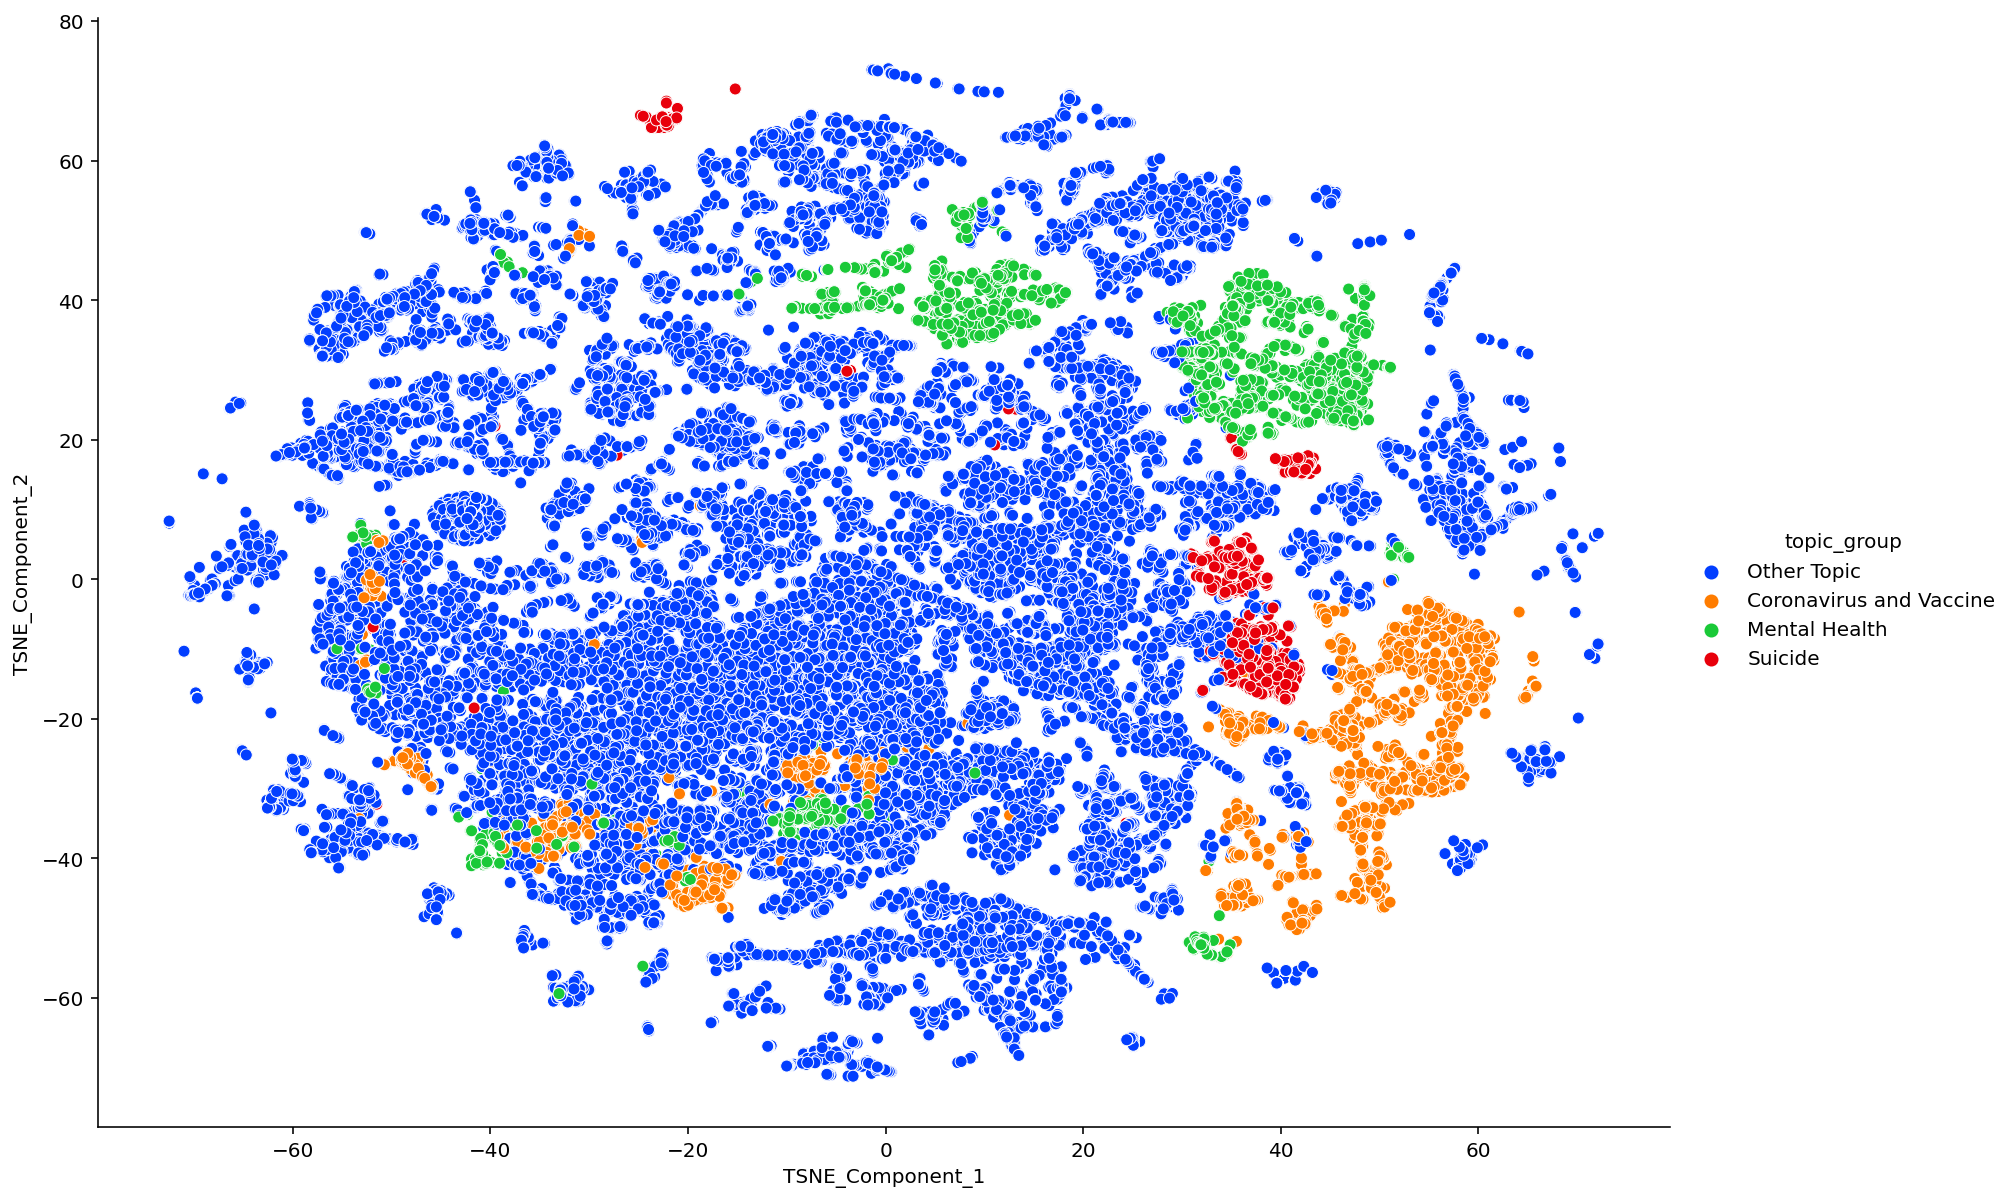

In [296]:

sns.relplot(x="TSNE_Component_1", y="TSNE_Component_2", hue="topic_group", data=df_final, legend = 'full',
            height=8.27, aspect=11.7/8.27, palette = "bright");

#"hls", 8

### K Means Analysis

In [246]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']


# uses custom metis style sheet for notebooks
from IPython.core.display import HTML
HTML("""<link rel="stylesheet" href="https://soph.info/metis/nb.css" type="text/css"/>""")

#######################
#       imports       #
#######################
import pandas as pd
import seaborn as sns

# import sklearn
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
#from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle

Populating the interactive namespace from numpy and matplotlib


/Users/arcarter/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [235]:
from sklearn.cluster import KMeans

In [236]:
km = KMeans(n_clusters=10)

In [237]:
km.fit(X_transf)

KMeans(n_clusters=10)

In [238]:
mu_digits = km.cluster_centers_

In [239]:
mu_digits.shape

(10, 2)

In [240]:
km.labels_.min()

0

In [256]:
num_clusters = 6
km = KMeans(n_clusters=num_clusters)
km.fit(X_transf)

KMeans(n_clusters=6)

In [257]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

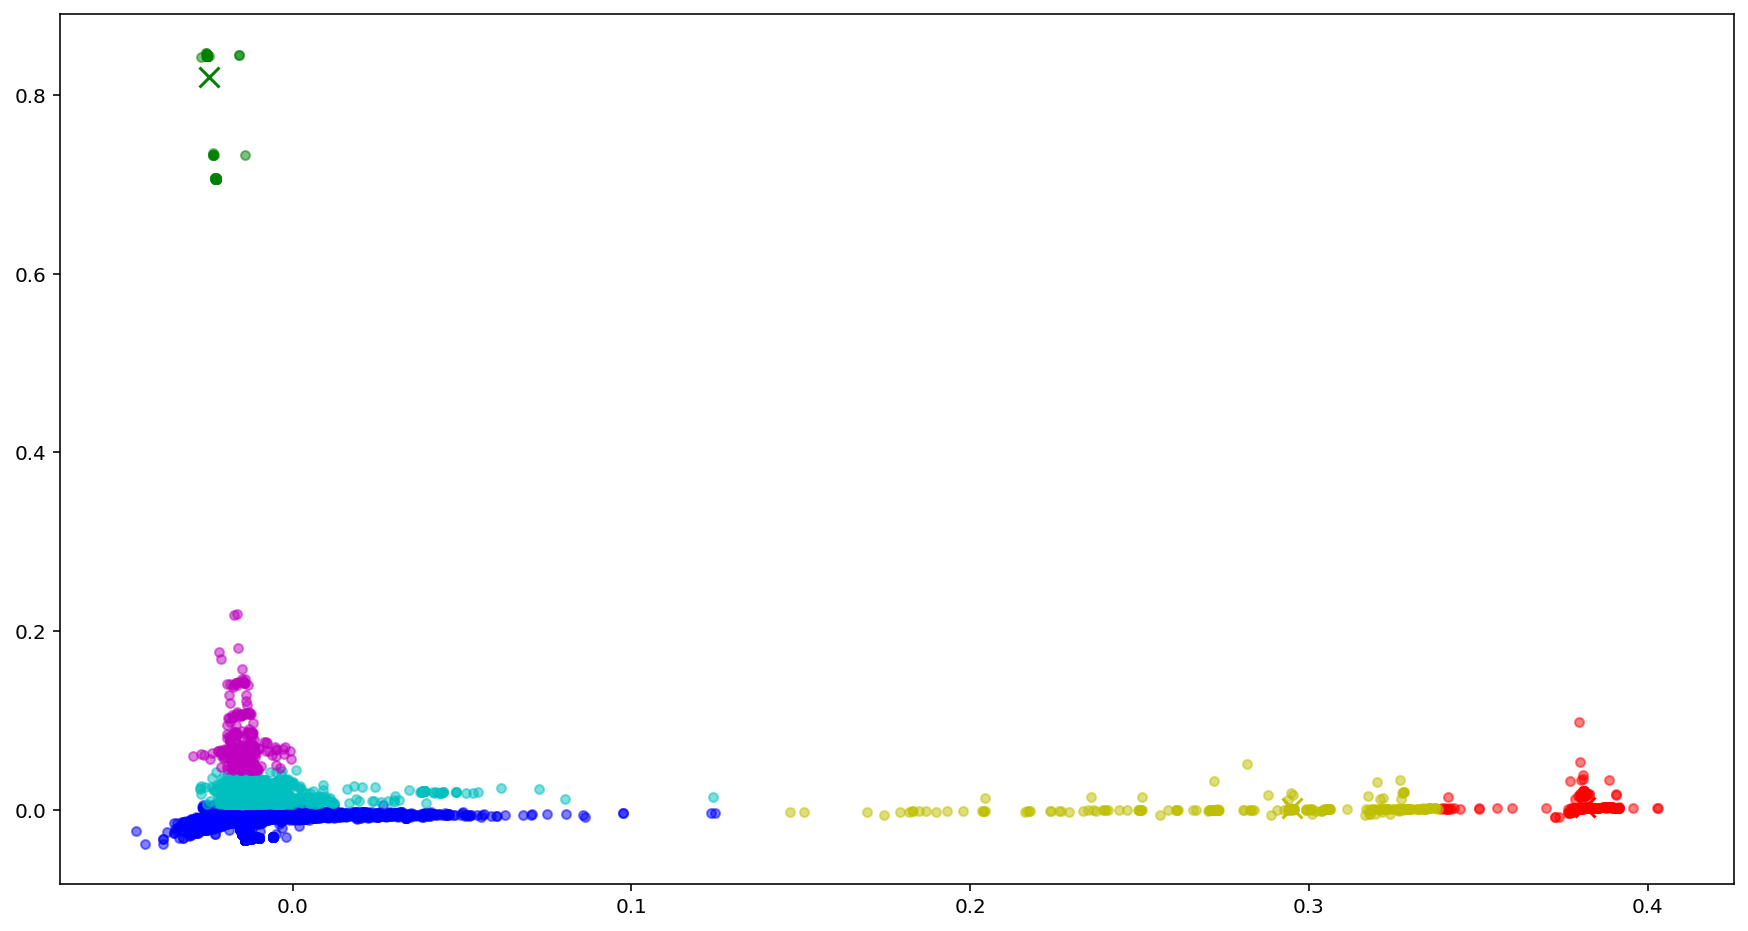

In [301]:
plt.figure(figsize=(15,8))
display_cluster(X_transf,km,num_clusters)

____
## ~ Appendix B: Additional Vectorizer and Topic Modeling Efforts ~
...including other vectorizers and other data visualizations not chosen for final presentation

In [51]:
#nmf_tfidf_25_topics_doc_topic = NMF_tester(25, df_aug2020_feb2021, doc_word_tfidf_ngrams3_sw2,vectorizer_tfidf_ngrams3_sw2);

TOPIC COUNT 25
Doc Topic Shape is:  (56861, 25)


The Topic Words are: 
Topic 1
['usdol usnationalguard usnavy', 'usdol usnationalguard', 'usnationalguard usnavy usmc', 'usedgov usdol usnationalguard', 'usedgov usdol', 'interior usedgov usdol']
-----------------
Topic 2
['abusive dog testing', 'permanently end abusive', 'end abusive', 'end abusive dog', 'abusive dog', 'permanently end']
-----------------
Topic 3
['usarmyeurope', 'usmc', 'usmarinecorps usarmy', 'usmarinecorps usarmy usnavyseals', 'usmc usmarinecorps usarmy', 'usnationalguard usmc usmarinecorps']
-----------------
Topic 4
['denismcdonough ambassadorrice mlfudge', 'ambassadorrice mlfudge', 'mlfudge usda hudgov', 'mlfudge usda', 'ambassadorrice mlfudge usda', 'denismcdonough ambassadorrice']
-----------------
Topic 5
['secwilkie', 'senthomtillis secwilkie', 'resign', 'senthomtillis', 'secwilkie resign', 'fpwellman']
-----------------
Topic 6
['bhmanagementandrew vernon', 'investigatorsbarry', 'gordonctalbert cerconetxleann

In [52]:
nmf_cvec_25_topics_doc_topic = NMF_tester(25, df_aug2020_feb2021, doc_word_sw_only_cvec_ngrams3,vectorizer_sw_only_cvec_ngrams3)

TOPIC COUNT 25
Doc Topic Shape is:  (56861, 25)


The Topic Words are: 
Topic 1
['usdol', 'interior', 'usnavy usmc usairforce', 'usnavy usmc', 'usedgov', 'usarmy interior']
-----------------
Topic 2
['usmc', 'usarmyeurope', 'usmarinecorps', 'usnavyseals', 'usarmy', 'usmc usmarinecorps']
-----------------
Topic 3
['amp', 'ok', 'families', 'support', 'military', 'dr']
-----------------
Topic 4
['fbi', 'cia', 'cia fbi', 'hazypeter', 'haircutspock citizenftw', 'wendzedin aviralassassin thedukeistheman']
-----------------
Topic 5
['denismcdonough', 'hudgov', 'usda', 'ambassadorrice', 'hillaryclinton', 'mlfudge']
-----------------
Topic 6
['suicide', 'called', 'time', 'prevention', 'suicide prevention', 'told']
-----------------
Topic 7
['care', 'health care', 'community', 'medical', 'community care', 'need']
-----------------
Topic 8
['end', 'testing', 'dog', 'sign', 'permanently', 'abusive']
-----------------
Topic 9
['votevets', 'vfwhq', 'davhq', 'iava', 'votevets iava', 'uswomenveterans'

In [ ]:
nmf_cvec_25_topics_doc_topic

In [67]:
nmf_25_topics_doc_topic = NMF_tester(25, df_aug2020_feb2021, doc_word_tfidf_ngrams3_sw2,vectorizer_tfidf_ngrams3_sw2)

TOPIC COUNT 25
Doc Topic Shape is:  (56827, 25)


The Topic Words are: 
Topic 1
['usdol usnationalguard', 'usdol usnationalguard usnavy', 'usnationalguard usnavy usmc', 'usedgov usdol usnationalguard', 'interior usedgov usdol', 'usedgov usdol']
-----------------
Topic 2
['abusive dog testing', 'permanently end abusive', 'abusive dog', 'end abusive dog', 'end abusive', 'permanently end']
-----------------
Topic 3
['usarmyeurope', 'usmc', 'usmarinecorps usarmy', 'usmarinecorps usarmy usnavyseals', 'usmc usmarinecorps usarmy', 'usnationalguard usmc usmarinecorps']
-----------------
Topic 4
['mlfudge usda hudgov', 'denismcdonough ambassadorrice mlfudge', 'ambassadorrice mlfudge', 'ambassadorrice mlfudge usda', 'mlfudge usda', 'denismcdonough ambassadorrice']
-----------------
Topic 5
['secwilkie', 'senthomtillis secwilkie', 'resign', 'senthomtillis', 'secwilkie resign', 'fpwellman']
-----------------
Topic 6
['gordonctalbert cerconetxleann', 'bhmanagementandrew vernon department_of_vacasey

In [95]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# sns.set_theme(style="ticks")

# #diamonds = sns.load_dataset("diamonds")

# f, ax = plt.subplots(figsize=(7, 5))
# sns.despine(f)

# sns.histplot(
#     diamonds,
#     x="price", hue="cut",
#     multiple="stack",
#     palette="light:m_r",
#     edgecolor=".3",
#     linewidth=.5,
#     log_scale=True,
# )
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([500, 1000, 2000, 5000, 10000])

<AxesSubplot:xlabel='month', ylabel='Count'>

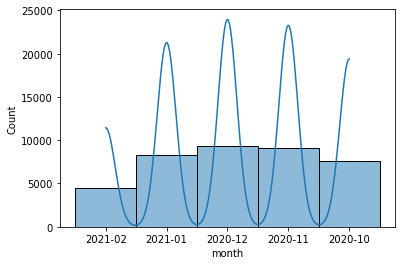

In [98]:
sns.histplot(data=df_nov2020_feb2021, x="month",kde=True)

<AxesSubplot:xlabel='month', ylabel='Count'>

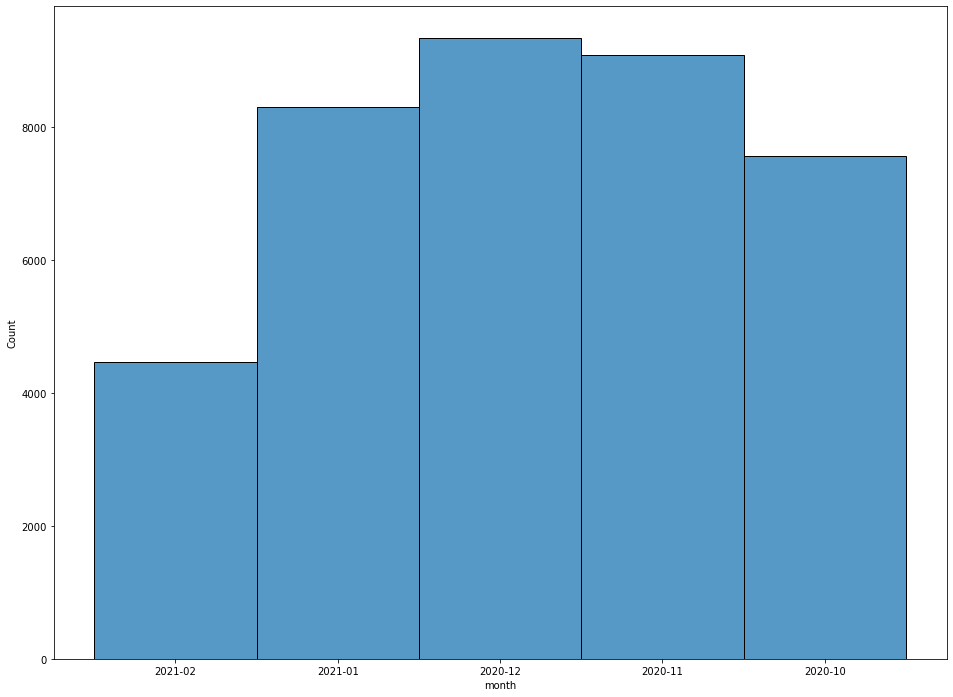

In [106]:
fig_dims = (16, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df_nov2020_feb2021, x="month",kde=False)

<AxesSubplot:xlabel='week_alt', ylabel='Count'>

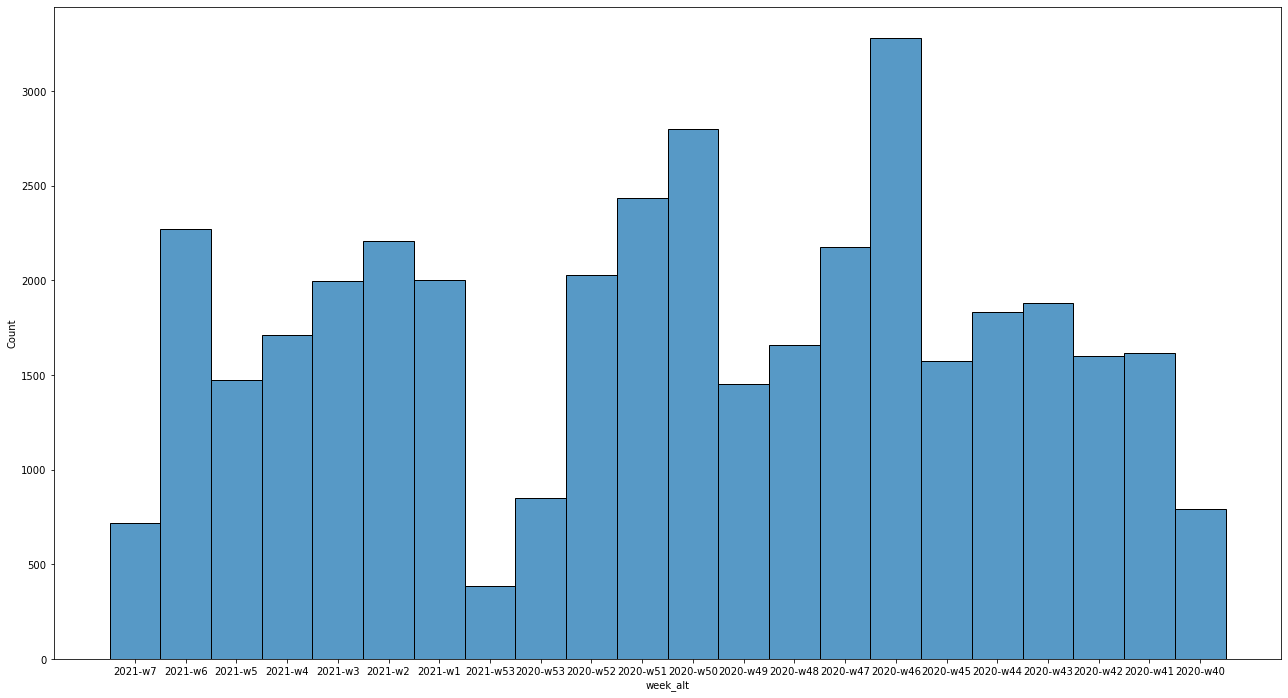

In [109]:
fig_dims = (22, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df_nov2020_feb2021, x="week_alt",kde=False )

# chart = sns.countplot(
#     data=data[data['Year'] == 1980],
#     x='Sport',
#     palette='Set1'
# )
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

<ipython-input-108-97fad1ab6bfd>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, '')]

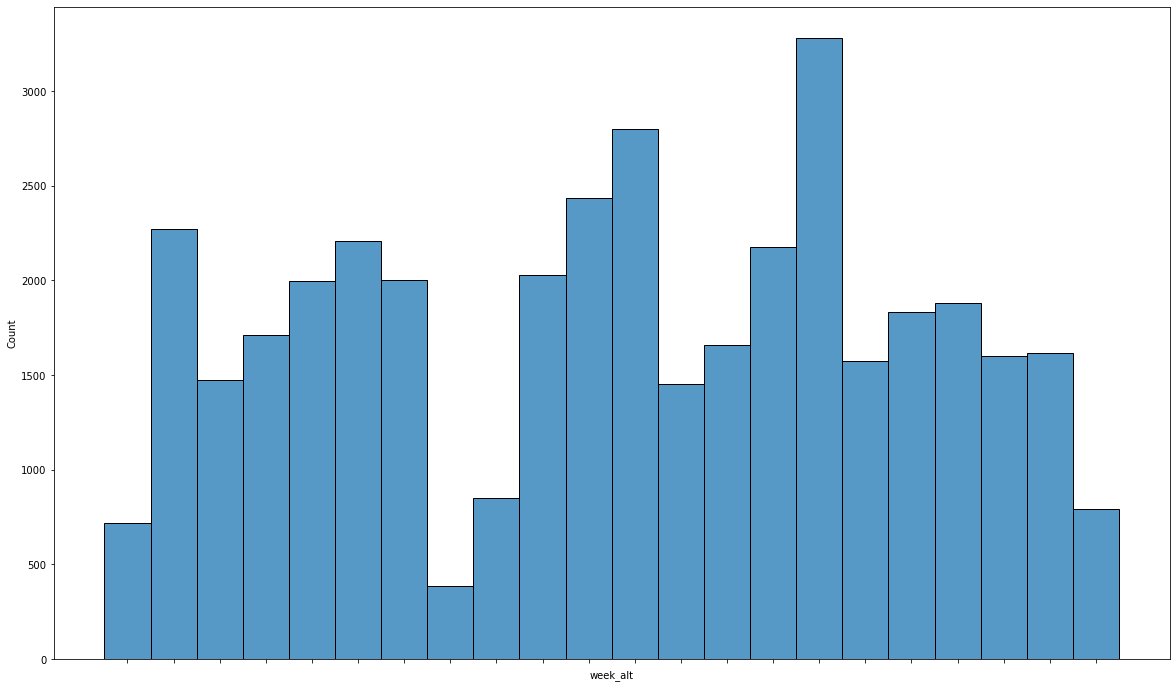

In [108]:
fig_dims = (20, 12)
fig, ax = plt.subplots(figsize=fig_dims)


chart = sns.histplot(data=df_nov2020_feb2021, x="week_alt")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

<AxesSubplot:xlabel='month', ylabel='Count'>

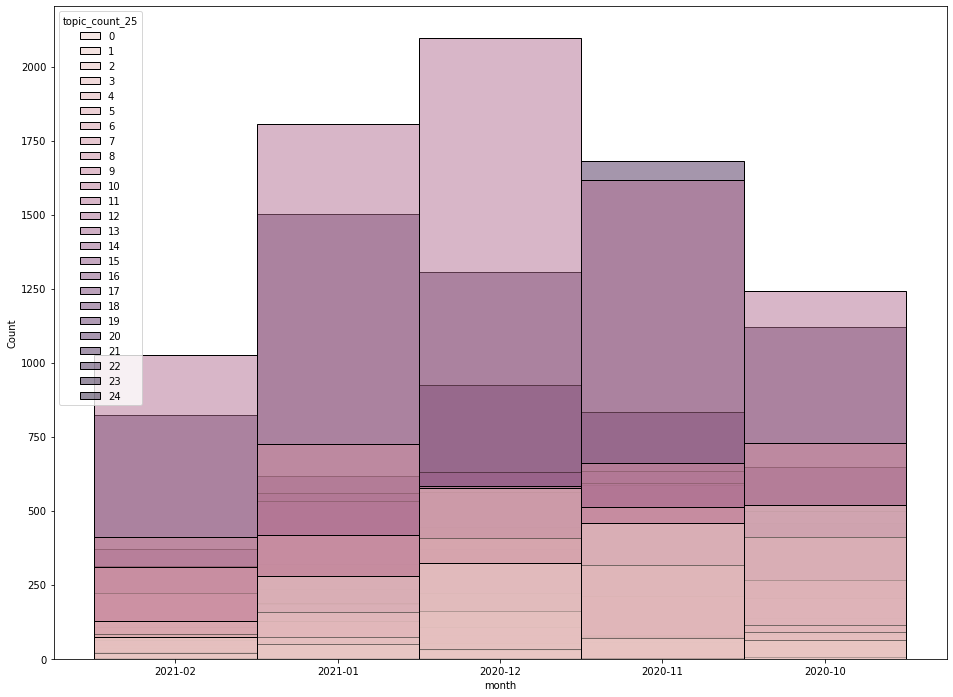

In [102]:
fig_dims = (16, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df_nov2020_feb2021, x="month",kde=False,hue = 'topic_count_25')

<AxesSubplot:xlabel='week_alt', ylabel='Count'>

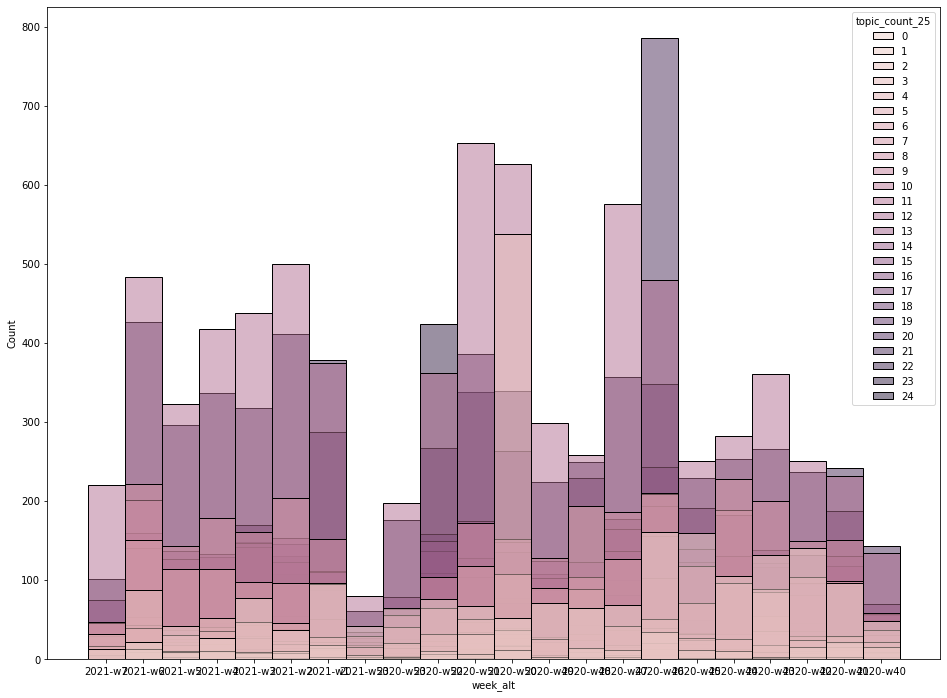

In [110]:
fig_dims = (16, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df_nov2020_feb2021, x="week_alt",kde=False,hue = 'topic_count_25')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

<ipython-input-112-f802f5b840a7>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, '')]

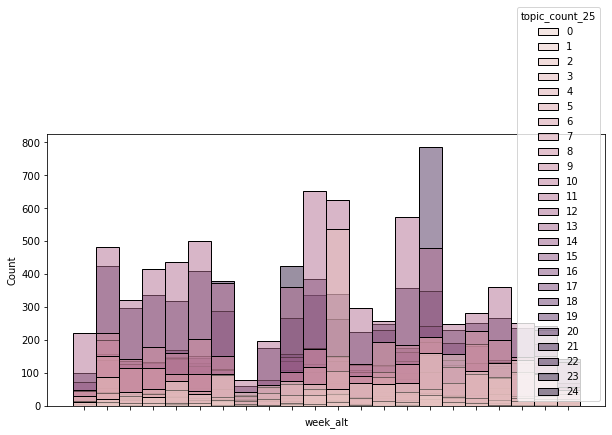

In [112]:
plt.figure(figsize=(10,5))

chart = sns.histplot(data=df_nov2020_feb2021, x="week_alt",kde=False,hue = 'topic_count_25')

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [96]:
#df_nov2020_feb2021[df_nov2020_feb2021['tweet'].str.contains(" ")]

In [42]:
nmf_25_topics_doc_topic_cvec_ngrams3 = NMF_tester(25, df_nov2020_feb2021, doc_word_sw_only_cvec_ngrams3,vectorizer_sw_only_cvec_ngrams3)

TOPIC COUNT 25
Doc Topic Shape is:  (38747, 25)


The Topic Words are: 
Topic 1
['gop', 'deptofdefense', 'usnavy usmc', 'interior', 'usdol', 'usnavy usmc usairforce']
-----------------
Topic 2
['usmc', 'usarmyeurope', 'usarmy', 'usnavy', 'usairforce', 'usmarinecorps']
-----------------
Topic 3
['denismcdonough', 'usda', 'hudgov', 'hillaryclinton', 'ambassadorrice', 'mlfudge']
-----------------
Topic 4
['fbi', 'cia', 'cia fbi', 'naturalbatheist', 'myhighhills', 'rjdownard']
-----------------
Topic 5
['suicide', 'called', 'time', 'prevention', 'suicide prevention', 'told']
-----------------
Topic 6
['amp', 'trump', 'ok', 'families', 'support', 'week']
-----------------
Topic 7
['votevets', 'vfwhq', 'realdonaldtrump', 'davhq', 'iava', 'votevets iava']
-----------------
Topic 8
['care', 'health', 'health care', 'mental', 'mental health', 'learn']
-----------------
Topic 9
['end', 'testing', 'sign', 'dog', 'permanently', 'abusive']
-----------------
Topic 10
['uressien', 'varesearch', 'vahs

In [77]:
df_nov2020_feb2021.sample(200)

,tweet,id,username,name,date,time,VBA Tweet,VA Tweet,VHA Tweet,dow,week,week_alt,month,topic_count_25
3933,under secretary for benefits dr paul lawrence re Veterans_Benefits_Admin overview“since we have completed an average of claims per year we completed these in about days”,1336697335041183749,vavetbenefits,Veterans Benefits,2020-12-09,10:40:53,1,0,0,2,2020-12-07/2020-12-13,2020-w50,2020-12,21
18872,department_of_va and just when i think i cant smh anymore,1358533976902701056,combatstressvet,Combatstress.vet,2021-02-07,16:51:55,0,1,0,6,2021-02-01/2021-02-07,2021-w5,2021-02,11
19378,department_of_va a ive been cheated out of a lot of my benefits by department_of_va already b every single catfishscammer that contacts me does so via va social media,1357799826667233280,otherotherrob,The Other Other Rob,2021-02-05,16:14:40,0,1,0,4,2021-02-01/2021-02-07,2021-w5,2021-02,21
46660,department_of_va has issued an interim final rule that could serve as a step toward authorizing pas and other healthcare professionals working at department_of_va to be granted full practice authority to practice to the full extent of their education and training,1328830284666712065,aapaorg,AAPA,2020-11-17,17:40:02,0,1,0,1,2020-11-16/2020-11-22,2020-w47,2020-11,21
42599,department_of_va i just wanna know how long y’all gone let georgia va medical centers drop the ball on taking care of their vets been here years and i think they are going for all time worst medical center,1336332561904066564,sayiriee,IRIEE 🇯🇲,2020-12-08,10:31:25,0,1,0,1,2020-12-07/2020-12-13,2020-w50,2020-12,11
56833,reprussfulcher realdonaldtrump department_of_va votevets voteblue,1313971135420145664,bjudy90,JAB,2020-10-07,18:35:05,0,1,0,2,2020-10-05/2020-10-11,2020-w41,2020-10,19
16350,magistrateassoc department_of_va kamalaharris potus veteranhearing i am pressing charges on t against my sister raquel leuqar watkins muhammad and lisa bonnet because they both was in my bank of america account and wells fargo account changing my passcode and,1360246124729171968,eelqadom,Eelqadom Muslimlina Muhammed,2021-02-12,10:15:22,0,1,0,4,2021-02-08/2021-02-14,2021-w6,2021-02,22
56453,loloverruled that’s why those boys stick to each other like brothers because they were duped into believing some stupid fantasy look at department_of_va walk through a hospital and tell me you don’t feel the negative cloud that hovers over that place department_of_va,1314692966028509184,justiceshanti,Justice & Shanti,2020-10-09,18:23:23,0,1,0,4,2020-10-05/2020-10-11,2020-w41,2020-10,11
53422,department_of_va maybe id was busy i was,1320127748522782722,id_doctor,Doctor Catanzaro,2020-10-24,18:19:16,0,1,0,5,2020-10-19/2020-10-25,2020-w43,2020-10,11
4068,stephengutowski it’s something like vets commit suicide a day in this country from my era war on terror we watched it live on tv and did something about it where is our memorial department_of_va Veterans_Benefits_Admin secvetaffairs,1334917418913828866,charles61683943,Good Conduct Chuck,2020-12-04,12:48:08,1,1,0,4,2020-11-30/2020-12-06,2020-w49,2020-12,14


In [26]:
df_nov2020_feb2021[df_nov2020_feb2021['tweet'].str.contains("revolut")].shape

(77, 14)

In [29]:
df_nov2020_feb2021[df_nov2020_feb2021['tweet'].str.contains("revolution")].shape

(17, 14)

In [31]:
df_nov2020_feb2021 = df_nov2020_feb2021[~df_nov2020_feb2021.tweet.str.contains("revolutapp")]

In [32]:
df_nov2020_feb2021.shape

(38687, 14)

In [47]:
df_nov2020_feb2021.topic_count_25.value_counts()

11    7790
21    6430
7     3107
20    2880
17    2628
16    2587
5     2060
19    1907
0     1656
22     907
14     867
24     835
4      834
2      785
23     546
12     481
8      455
6      441
9      433
15     376
13     260
1      240
10     136
3       97
18       9
Name: topic_count_25, dtype: int64

#### Review Topic Modeling Array

In [46]:
nmf_25_topics_doc_topic_cvec_ngrams3

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25
0,0.000000,0.000000,0.000000,0.000373,0.000000,0.000239,0.000000,0.000371,0.000000,0.000000,...,0.000000,0.003172,0.000488,0.000001,0.000008,0.000576,0.000000,0.000000,0.000211,0.000000
1,0.000042,0.000000,0.000454,0.000186,0.000000,0.000524,0.000697,0.000545,0.000000,0.000636,...,0.000574,0.004511,0.002421,0.000027,0.000000,0.004049,0.021860,0.001108,0.003214,0.000000
2,0.000000,0.000000,0.000023,0.000000,0.000000,0.000492,0.000000,0.001173,0.024462,0.000000,...,0.000529,0.001508,0.003008,0.000000,0.000000,0.000000,0.002913,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000138,0.000000,0.000000,0.000000,0.001415,...,0.001124,0.000000,0.000000,0.000000,0.000000,0.000000,0.006409,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006,0.000000,...,0.000000,0.000000,0.000388,0.000000,0.000000,0.000000,0.000062,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.307465,0.000000,0.000000,...,0.000000,0.196426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001086,0.000000
38743,0.000000,0.000000,0.000000,0.000492,0.017638,0.003376,0.000565,0.008103,0.000000,0.000000,...,0.000000,0.002197,0.006598,0.000000,0.000000,0.009557,0.021760,0.001176,0.000359,0.000000
38744,0.000000,0.000000,0.000035,0.000000,0.000000,0.000000,0.000000,0.000078,0.000000,0.000000,...,0.000000,0.000000,0.000082,0.000000,0.000000,0.000000,0.000242,0.000000,0.000641,0.000000
38745,0.010990,0.056953,0.000448,0.000000,0.012292,0.000000,0.026619,0.000000,0.000000,0.000000,...,0.019171,0.092452,0.000000,0.000000,0.127810,0.015312,0.000000,0.000000,0.000000,0.131335


#### PCA

In [50]:
from sklearn.preprocessing import StandardScaler

#x = nmf_25_topics_doc_topic_cvec_ngrams3.loc[:, :].values

x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

In [51]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.165829,-0.230293,-0.414966,-0.148893,0.057444,0.004646,-0.009443,0.059192,0.019957,0.015054,...,0.036889,-0.046941,-0.030840,-0.057624,-0.079067,0.155477,0.025558,0.024916,-0.206161,-0.891014
1,0.005932,0.024985,-0.357680,0.045311,0.040288,0.300331,-0.028221,0.033967,0.036183,-0.048113,...,-0.035100,-0.054425,0.021244,-0.186770,-0.281889,0.163092,-0.136307,-0.200758,-0.103483,-0.450817
2,0.147168,-0.234936,-0.512387,-0.211795,0.244795,0.102884,0.023593,0.069717,0.111193,-0.213260,...,0.011379,0.138041,-0.160514,0.041146,0.060564,-0.003051,-0.006672,-0.034045,-0.168945,-0.727990
3,0.110778,-0.208963,-0.295689,-0.104424,-0.019069,0.154607,-0.012663,0.054272,0.002435,-0.000204,...,-0.021407,0.004782,0.048649,-0.070616,-0.064156,0.087793,-0.042389,-0.151187,-0.173962,-0.753118
4,0.181935,-0.252780,-0.414526,-0.134651,0.032751,0.056530,0.002781,0.050936,0.028850,-0.003690,...,0.014248,-0.011202,0.011252,-0.069016,-0.062390,0.142781,0.034301,0.029698,-0.215817,-0.926576


In [60]:
# explained_variance = pca.explained_variance_ratio_
# explained_variance

In [59]:
# x_pca.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14',
#                  'PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25']
# x_pca.head()

#### T-SNE

In [58]:
import matplotlib.pyplot as plt

In [61]:
from sklearn.manifold import TSNE

In [63]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=7, angle=.99, init='pca')
# 13-D -> 2-D
tsne_nmf = tsne_model.fit_transform(nmf_25_topics_doc_topic_cvec_ngrams3) # doc_topic is document-topic matrix from LDA or GuidedLDA 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 38747 samples in 1.601s...
[t-SNE] Computed neighbors for 38747 samples in 47.569s...
[t-SNE] Computed conditional probabilities for sample 1000 / 38747
[t-SNE] Computed conditional probabilities for sample 2000 / 38747
[t-SNE] Computed conditional probabilities for sample 3000 / 38747
[t-SNE] Computed conditional probabilities for sample 4000 / 38747
[t-SNE] Computed conditional probabilities for sample 5000 / 38747
[t-SNE] Computed conditional probabilities for sample 6000 / 38747
[t-SNE] Computed conditional probabilities for sample 7000 / 38747
[t-SNE] Computed conditional probabilities for sample 8000 / 38747
[t-SNE] Computed conditional probabilities for sample 9000 / 38747
[t-SNE] Computed conditional probabilities for sample 10000 / 38747
[t-SNE] Computed conditional probabilities for sample 11000 / 38747
[t-SNE] Computed conditional probabilities for sample 12000 / 38747
[t-SNE] Computed conditional probabilities for sa

In [66]:
tsne_nmf[:,1]

array([-41.218605 ,  -6.2369413,  32.147224 , ..., -55.70862  ,
        14.434207 , -19.25399  ], dtype=float32)

In [68]:
tsne_nmf.shape

(38747, 2)

In [15]:
tsne_nmf.info()

NameError: name 'tsne_nmf' is not defined

In [69]:
nmf_25_topics_doc_topic_cvec_ngrams3.join(pd.DataFrame(tsne_nmf))

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,0,1
0,0.0000000000,0.0000000000,0.0000000000,0.0003725363,0.0000000000,0.0002386397,0.0000000000,0.0003706015,0.0000000000,0.0000000000,0.0000000000,0.0001607199,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0031720538,0.0004878859,0.0000011851,0.0000077963,0.0005761851,0.0000000000,0.0000000000,0.0002106106,0.0000000000,15.2884845734,-41.2186050415
1,0.0000416391,0.0000000000,0.0004542694,0.0001856701,0.0000000000,0.0005238296,0.0006967049,0.0005453414,0.0000000000,0.0006361025,0.0000000000,0.0043522829,0.0000000000,0.0000000000,0.0000000000,0.0005743513,0.0045106926,0.0024214735,0.0000270788,0.0000000000,0.0040486573,0.0218598612,0.0011083561,0.0032141007,0.0000000000,0.6644135714,-6.2369413376
2,0.0000000000,0.0000000000,0.0000230381,0.0000000000,0.0000000000,0.0004918002,0.0000000000,0.0011725939,0.0244618977,0.0000000000,0.0000000000,0.0012036036,0.0001050055,0.0000000000,0.0000000000,0.0005289886,0.0015080216,0.0030077140,0.0000000000,0.0000000000,0.0000000000,0.0029131296,0.0000000000,0.0000000000,0.0000000000,4.1619434357,32.1472244263
3,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0001379489,0.0000000000,0.0000000000,0.0000000000,0.0014152727,0.0000000000,0.0050622221,0.0000000000,0.0000000000,0.0000000000,0.0011239092,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0064091059,0.0000000000,0.0000000000,0.0000000000,8.2670459747,-14.8667688370
4,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000059883,0.0000000000,0.0000000000,0.0000983652,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0003881078,0.0000000000,0.0000000000,0.0000000000,0.0000624135,0.0000000000,0.0000000000,0.0000000000,37.7978973389,-42.6316566467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38742,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.3074648328,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.1964258280,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0010863260,0.0000000000,-55.0738449097,-20.7416019440
38743,0.0000000000,0.0000000000,0.0000000000,0.0004921252,0.0176381428,0.0033755747,0.0005653310,0.0081030675,0.0000000000,0.0000000000,0.0000000000,0.0039857210,0.0011668449,0.0000000000,0.0000000000,0.0000000000,0.0021969902,0.0065979854,0.0000000000,0.0000000000,0.0095565616,0.0217600878,0.0011762214,0.0003592773,0.0000000000,0.7762635946,62.8977699280
38744,0.0000000000,0.0000000000,0.0000349584,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000783964,0.0000000000,0.0000000000,0.0000000000,0.0002644905,0.0006019099,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000822708,0.0000000000,0.0000000000,0.0000000000,0.0002415771,0.0000000000,0.0006407760,0.0000000000,30.3536434174,-55.7086181641
38745,0.0109904853,0.0569528107,0.0004479398,0.0000000000,0.0122918773,0.0000000000,0.0266191194,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0057274540,0.0000000000,0.0000000000,0.0000000000,0.0191705935,0.0924516377,0.0000000000,0.0000000000,0.1278097343,0.0153119124,0.0000000000,0.0000000000,0.0000000000,0.1313354599,65.2748489380,14.4342069626


In [81]:
import seaborn as sns
#sns.set_theme(style="darkgrid")

In [80]:
tsne_combined = df_nov2020_feb2021.join(pd.DataFrame(tsne_nmf))

In [89]:
tsne_combined[tsne_combined['TSNE_Component_1'].isna()]
#df[df['column name'].isna()]

,tweet,id,username,name,date,time,VBA Tweet,VA Tweet,VHA Tweet,dow,week,week_alt,month,topic_count_25,TSNE_Component_1,TSNE_Component_2
38747,leoshane department_of_va awful department_of_va would do well to engage survivors before planning outreach it would help va avoid mistakes like this and be more effective they called and submitted a question thats only a response rate,1340000772000526336,amazingprmaven,Ami Neiberger-Miller,2020-12-18,13:27:34,0,1,0,4,2020-12-14/2020-12-20,2020-w51,2020-12,17,nan,nan
38748,department_of_va musicforvets veteransagainsttrump,1340000698608455681,jadee2223,Jean Dean,2020-12-18,13:27:17,0,1,0,4,2020-12-14/2020-12-20,2020-w51,2020-12,19,nan,nan
38749,senjoemanchin department_of_va wvva is also unacceptable,1340000646221717505,ivona2012ka,Kathy Allen,2020-12-18,13:27:04,0,1,0,4,2020-12-14/2020-12-20,2020-w51,2020-12,11,nan,nan
38750,leoshane stevenbeynon department_of_va i’m receiving full disability compensation and i can’t count the number of times i was asked if i wanted to claim ptsd and my answer was always the trauma is current when dealing with this claim,1340000473042972673,gerardsleeps,please don’t litter,2020-12-18,13:26:23,0,1,0,4,2020-12-14/2020-12-20,2020-w51,2020-12,11,nan,nan
38751,red friday american military appreciation thread friday dec veterans department_of_va veteransunited vfwhq Veterans_Health_Admin tqphmilitary potus navy marines army airforce coastguard spaceforce complete news,1340000456651714563,motivation724,MOTIVATION724,2020-12-18,13:26:19,0,1,1,4,2020-12-14/2020-12-20,2020-w51,2020-12,21,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128347,limiting coronavirus_pandemic exposure during coronavirus_pandemic has made virtual care even more important va video connect lets veterans receive quality health care in a safe and timely manner right from the comfort of home read more,1311654129304055809,veteranshealth,Veterans Health,2020-10-01,09:08:08,0,0,1,3,2020-09-28/2020-10-04,2020-w40,2020-10,7,nan,nan
128348,according to the centers for disease control and prevention about in women and in men have experienced sexual violence physical violence andor stalking by an intimate partner during their lifetime stand up to stop harassment now whiteribbonva harassmentfreeva,1311622017179938818,veteranshealth,Veterans Health,2020-10-01,07:00:32,0,0,1,3,2020-09-28/2020-10-04,2020-w40,2020-10,21,nan,nan
128349,Veterans_Health_Admin malicious child rapisf in lancehuggins bedroom,1311616507198275584,lancehuggins2,Lancehuggins,2020-10-01,06:38:38,0,0,1,3,2020-09-28/2020-10-04,2020-w40,2020-10,23,nan,nan
128350,veteran who voted for trump now backs biden after wife dies of coronavirus_pandemic vfwhq vfwmag disabledvetscpx votevets Veterans_Health_Admin avcupdate usnavy usarmy usairforce usmc armyofnaveed via aol,1311594304767438849,elvondrake,Ludvig,2020-10-01,05:10:25,0,0,1,3,2020-09-28/2020-10-04,2020-w40,2020-10,24,nan,nan


In [87]:
tsne_combined.sample(3)

,tweet,id,username,name,date,time,VBA Tweet,VA Tweet,VHA Tweet,dow,week,week_alt,month,topic_count_25,TSNE_Component_1,TSNE_Component_2
41151,hillaryclinton denismcdonough ambassadorrice mlfudge department_of_va usda hudgov its d same folks that worked for barackobama amp i see rahmemanuel is being shut our amp i say good cuz hes no longer chicago mayor cuz he didnt do my log roll deal no later than rahm see how it feels get shut out of d log roll political deal,1337501243225333763,earlworthington,Earl Worthington,2020-12-11,15:55:20,0,1,0,4,2020-12-07/2020-12-13,2020-w50,2020-12,2,nan,nan
45839,markszaidesq rosiewearamask department_of_va dancrenshawtx someone needs to poke him in the,1329842524291272705,samstone2112,Sam Stone,2020-11-20,12:42:19,0,1,0,4,2020-11-16/2020-11-22,2020-w47,2020-11,11,nan,nan
33474,department_of_va years ago on jan president harry truman signed a law establishing vha’s predecessor the department of medicine and surgery within va ushering in a new era of veteran’s health care via vantagepoint,1346493729138503681,lccc_sva,LCCC SVA,2021-01-05,11:28:16,0,1,0,1,2021-01-04/2021-01-10,2021-w1,2021-01,7,-69.1360626221,-6.2824711800


In [90]:
tsne_combined_noNAN = tsne_combined.dropna(subset=['TSNE_Component_1','TSNE_Component_2'])

In [92]:
tsne_combined_noNAN.shape

(15483, 16)

In [86]:
tsne_combined.rename(columns={0: 'TSNE_Component_1', 1: 'TSNE_Component_2'}, inplace=True)

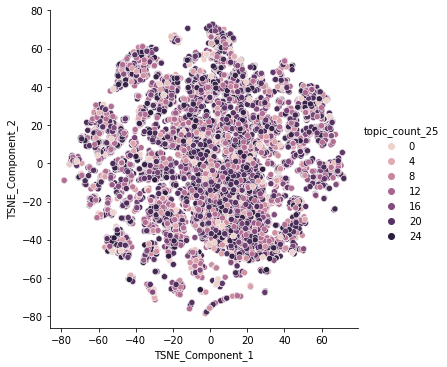

In [93]:
sns.relplot(x="TSNE_Component_1", y="TSNE_Component_2", hue="topic_count_25", data=tsne_combined_noNAN);